# Blackman-Harris Window

The **Blackman-Harris window** is a generalized cosine window designed for very **low sidelobe levels**, making it especially useful for **spectral analysis** when **leakage suppression** is critical. It's defined as:

$$
w[n] = a_0 - a_1 \cos\left(\frac{2\pi n}{M-1}\right) + a_2 \cos\left(\frac{4\pi n}{M-1}\right) - a_3 \cos\left(\frac{6\pi n}{M-1}\right)
$$

with typical coefficients:

$$
a_0 = 0.35875,\quad a_1 = 0.48829,\quad a_2 = 0.14128,\quad a_3 = 0.01168
$$

This window has better sidelobe suppression than the standard Blackman window, but at the cost of a wider main lobe.


In [3]:
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

sns.set_style("whitegrid")

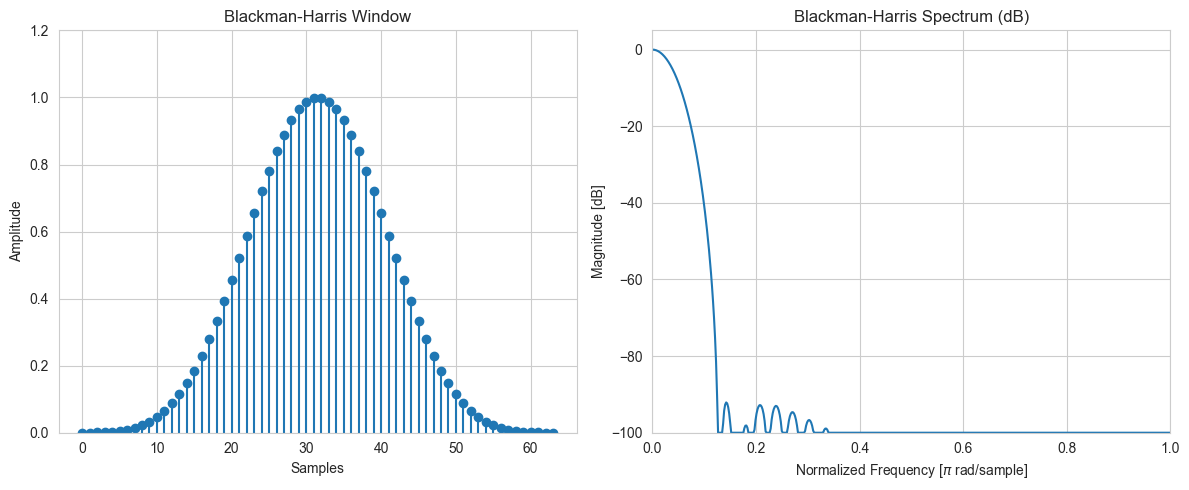

In [4]:
# --- Analysis parameters ---
M = 64  # Window length
N = 2**int(np.ceil(np.log2(M * 16)))  # Zero-padding FFT length
dB_cut = -100  # Minimum dB level to clip
eps = np.finfo(float).eps  # Small value to avoid log(0)

# --- Symmetric Blackman-Harris window ---
n = np.arange(M)
a0, a1, a2, a3 = 0.35875, 0.48829, 0.14128, 0.01168
wbh = (a0 
       - a1 * np.cos(2 * np.pi * n / (M - 1)) 
       + a2 * np.cos(4 * np.pi * n / (M - 1)) 
       - a3 * np.cos(6 * np.pi * n / (M - 1)))

# --- Zero-padding and center shift ---
is_odd = M % 2
half = (M - is_odd) // 2
wbh_zp = np.concatenate([wbh[half:], np.zeros(N - M), wbh[:half]])

# --- FFT and dB normalization ---
W = np.fft.fft(wbh_zp)
W_dB = 20 * np.log10(np.abs(W) + eps)
W_dB -= np.max(W_dB)
W_dB = np.maximum(W_dB, dB_cut)

# --- Frequency axis ---
nf = np.linspace(0, 2, N, endpoint=False)

# --- Plotting ---
plt.figure(figsize=(12, 5))

plt.subplot(1, 2, 1)
plt.stem(n, wbh, basefmt=" ")
plt.title("Blackman-Harris Window")
plt.xlabel("Samples")
plt.ylabel("Amplitude")
plt.grid(True)
plt.ylim(0, 1.2)

plt.subplot(1, 2, 2)
plt.plot(nf, W_dB)
plt.title("Blackman-Harris Spectrum (dB)")
plt.xlabel(r"Normalized Frequency [$\pi$ rad/sample]")
plt.ylabel("Magnitude [dB]")
plt.grid(True)
plt.xlim(0, 1)
plt.ylim(dB_cut, 5)

plt.tight_layout()
plt.show()

## Notes

* **Main lobe width**: Wider than Hann or Hamming
* **Sidelobes**: Extremely well suppressed (\~ -92 dB)
* **Use case**: When **spectral leakage must be minimized** (e.g., measuring weak tones near strong ones)
